In [2]:
import pandas as pd
import seaborn as sns 

In [11]:
distances = pd.read_csv("distances.csv")
distances['sensor2'] = distances['sensor2'].astype(int)
distances['sensor1'] = distances['sensor1'].astype(int)

#rename to 'first sensor'
distances['First Sensor'] = distances['sensor1']
distances['First Sensor'] += 1

distances['Second Sensor'] = distances['sensor2']
distances['Second Sensor'] += 1
distances = distances.drop(['sensor1', 'sensor2'], axis=1)

df_pivot = distances.pivot_table(index='First Sensor', columns='Second Sensor', values='euclidean_distance')


<AxesSubplot:xlabel='Second Sensor', ylabel='First Sensor'>

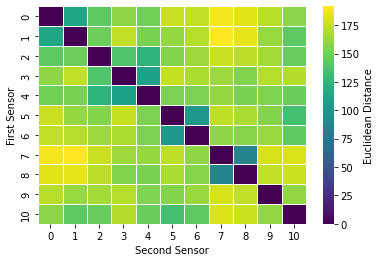

In [12]:
# Define the color palette
color_palette = sns.color_palette("viridis", as_cmap=True)

# Create the heatmap
sns.heatmap(df_pivot, cmap=color_palette, annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Euclidean Distance'})

In [ ]:
# Define the color palette
color_palette = sns.color_palette("viridis", as_cmap=True)

# Create the heatmap
sns.heatmap(df_pivot, cmap=color_palette, annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Euclidean Distance'})